In [1]:
# project: p5
# submitter: mchoi82
# partner: none
# hours: 20

In [2]:
import zipfile
import pandas as pd
import edgar_utils
from collections import Counter
from graphviz import Digraph, Graph
from shapely.geometry import Polygon, box, Point
import geopandas as gpd
import re
from collections import defaultdict

In [3]:
#q1

file = zipfile.ZipFile("server_log.zip")
df = pd.read_csv(file.open("rows.csv"))
total = 0
for elem in df['size']:
    total += elem
int(total)

24801002666

In [4]:
#q2
temp = df.groupby('ip')['cik'].count().sort_values(ascending=False)
dic = temp[:10].to_dict()
dic

{'54.152.17.ccg': 12562,
 '183.195.251.hah': 6524,
 '52.45.218.ihf': 5562,
 '68.180.231.abf': 5493,
 '204.212.175.bch': 4708,
 '103.238.106.gif': 4428,
 '208.77.215.jeh': 3903,
 '208.77.214.jeh': 3806,
 '217.174.255.dgd': 3551,
 '82.13.163.caf': 3527}

In [5]:
#q3
num = 0
for elem in df['code']:
    if elem >= 400:
        num += 1
num/len(df.index)

0.03466852724527611

In [6]:
#q4
df['cik'] = df['cik'].astype(int)
df['frequent'] = df[['cik','accession','extention']].astype(str).apply('/'.join,1)
acs = df.groupby(["frequent"])['ip'].count().sort_values(ascending=False)
acs.index[0]

'1627631/0001627631-15-000004/.txt'

In [7]:
#q5
count = df["crawler"].value_counts()
int(count[1.0])

971

In [8]:
#q6
df['region'] = df.apply(lambda x: edgar_utils.lookup_region(x['ip']), axis=1)
count_sorted = df['region'].value_counts() 
count_sorted.index[0]   

'United States of America'

In [9]:
#q7
ip_num = df['ip'].value_counts()
dic = defaultdict(list)
update_dic = {}
for i in range(len(ip_num)):
    dic[edgar_utils.lookup_region(ip_num.index[i])].append(ip_num.values[i])
for i, val in dic.items():
    count = 0
    for elem in val:
        if elem > 1000:
            count += 1
    update_dic[i] = count/len(val)
update_dic

{'United States of America': 0.019862490450725745,
 'China': 0.006864988558352402,
 'India': 0.058823529411764705,
 'United Kingdom of Great Britain and Northern Ireland': 0.06666666666666667,
 'Korea (Republic of)': 0.2,
 'Canada': 0.017857142857142856,
 'France': 0.0036900369003690036,
 'Bulgaria': 0.3333333333333333,
 'Ireland': 0.3125,
 'Australia': 0.07692307692307693,
 'Hong Kong': 0.0,
 'Germany': 0.0,
 'Czechia': 0.0,
 'Estonia': 0.0,
 'Viet Nam': 0.0,
 'Poland': 0.0,
 'Netherlands': 0.0,
 '-': 0.0,
 'Slovakia': 0.0,
 'Russian Federation': 0.0,
 'Spain': 0.0,
 'Indonesia': 0.0,
 'Ukraine': 0.0,
 'Croatia': 0.0,
 'Italy': 0.0,
 'Taiwan (Province of China)': 0.0,
 'Virgin Islands (British)': 0.0,
 'Liberia': 0.0,
 'Singapore': 0.0,
 'Denmark': 0.0,
 'Romania': 0.0,
 'Luxembourg': 0.0,
 'Switzerland': 0.0,
 'Israel': 0.0,
 'Philippines': 0.0,
 'Egypt': 0.0,
 'Brazil': 0.0,
 'Honduras': 0.0,
 'Greece': 0.0,
 'Sweden': 0.0,
 'Japan': 0.0,
 'Cyprus': 0.0,
 'Latvia': 0.0,
 'Thailand':

In [10]:
#q8
zf = zipfile.ZipFile("docs.zip")
html = zf.open('850693/0000850693-07-000159/-index.htm', "r").read().decode('utf-8')
edgar_utils.Filing(html).dates

['2007-07-25', '2007-07-25', '2007-07-23']

In [11]:
#q9
f = zipfile.ZipFile('docs.zip', 'r')
cur = [state for state in f.namelist() if state.endswith('htm') or state.endswith('html')]
repo_state = []
ini = {}
final = {}
for var in cur:
    ini[var] = edgar_utils.Filing(str(f.read(var), encoding="utf8"))
    repo_state.append(ini[var].state())
for elem in repo_state:
    final[elem] = 1+ final.get(elem, 0)
sorted_final = {key: value for key, value in sorted(final.items(), key=lambda item: item[1], reverse=True)}
del sorted_final[None]
sorted_final



{'CA': 91,
 'NY': 83,
 'TX': 64,
 'MA': 30,
 'CO': 25,
 'IL': 25,
 'PA': 25,
 'NJ': 23,
 'FL': 21,
 'VA': 15,
 'MN': 15,
 'CT': 14,
 'MD': 13,
 'MI': 11,
 'OH': 10,
 'DE': 10,
 'NC': 9,
 'WI': 9,
 'GA': 8,
 'OK': 7,
 'OX': 6,
 'NV': 6,
 'IA': 6,
 'UT': 5,
 'KS': 5,
 'AZ': 5,
 'IN': 4,
 'TN': 4,
 'MO': 4,
 'WA': 3,
 'KY': 2,
 'NE': 2,
 'LA': 2,
 'OR': 2,
 'WV': 2,
 'MS': 1,
 'AL': 1,
 'SD': 1,
 'NM': 1,
 'AR': 1,
 'VT': 1,
 'ID': 1,
 'DC': 1,
 'ME': 1}

In [12]:
#q10
lst = []
for elem in cur:
    lst.append(ini[f'{elem}'].sic)
count = {}
for num in lst:
    if num == None:
        continue
    else:
        count[num] = 1 + count.get(num, 0)
count

{2834: 40,
 6022: 20,
 1311: 20,
 6189: 17,
 6211: 17,
 8731: 2,
 1389: 19,
 7370: 7,
 3571: 1,
 7361: 1,
 3674: 5,
 4931: 5,
 1040: 2,
 2810: 2,
 7389: 11,
 3140: 1,
 7374: 4,
 6200: 1,
 7381: 1,
 3620: 3,
 3841: 6,
 4941: 1,
 5621: 1,
 7330: 1,
 6199: 8,
 6798: 20,
 2510: 4,
 3990: 2,
 1700: 5,
 7371: 6,
 5940: 2,
 4522: 5,
 1731: 2,
 6311: 2,
 8082: 2,
 2836: 13,
 6021: 20,
 1000: 11,
 4911: 8,
 6324: 2,
 8051: 1,
 6035: 4,
 3550: 1,
 4813: 4,
 6321: 2,
 2890: 1,
 3845: 2,
 2860: 8,
 1221: 2,
 3669: 2,
 6411: 1,
 5900: 2,
 2320: 1,
 6221: 3,
 6331: 10,
 2070: 1,
 8742: 5,
 3829: 3,
 900: 5,
 5500: 2,
 7372: 11,
 6770: 1,
 4841: 2,
 4833: 1,
 7384: 1,
 6799: 3,
 3826: 5,
 8711: 2,
 5160: 1,
 5944: 1,
 3420: 3,
 3510: 3,
 5960: 1,
 3842: 4,
 8062: 3,
 6029: 11,
 7320: 1,
 5172: 2,
 1382: 2,
 3663: 4,
 1400: 3,
 7822: 1,
 2024: 1,
 2080: 1,
 7812: 2,
 4922: 2,
 2030: 1,
 3576: 3,
 2711: 1,
 3578: 1,
 3679: 2,
 2842: 1,
 4899: 1,
 100: 1,
 3541: 1,
 7311: 1,
 3317: 1,
 2033: 1,
 3721: 1

In [13]:
#q11
dic = {}
for elem in df['frequent']:
    if elem in cur:
        ind = ini[f'{elem}'].sic
        dic[ind] = 1 + dic.get(ind, 0)
dic_final = {key: value for key, value in sorted(dic.items(), key=lambda item: item[1], reverse=True)}
del dic_final[None]
dic_final

{2834: 984,
 1389: 656,
 1311: 550,
 2836: 429,
 6022: 379,
 1000: 273,
 6211: 237,
 7371: 229,
 2860: 226,
 6021: 204,
 6282: 171,
 2510: 171,
 3825: 164,
 4841: 108,
 5621: 99,
 7200: 94,
 7374: 94,
 6331: 91,
 6798: 90,
 5311: 90,
 3842: 87,
 6221: 85,
 6029: 83,
 3272: 81,
 3829: 73,
 4931: 70,
 3510: 66,
 7830: 62,
 3826: 56,
 3695: 55,
 3620: 50,
 7373: 48,
 6799: 46,
 4412: 43,
 4512: 42,
 7340: 40,
 7370: 39,
 900: 39,
 6513: 38,
 3621: 38,
 5172: 36,
 5900: 35,
 4213: 35,
 3990: 34,
 5122: 34,
 5944: 33,
 2070: 33,
 8090: 32,
 1700: 31,
 3312: 31,
 1381: 31,
 4922: 31,
 6324: 30,
 8742: 27,
 7389: 26,
 8731: 25,
 7812: 25,
 3590: 24,
 4955: 23,
 3663: 23,
 4522: 22,
 6321: 21,
 3559: 20,
 5812: 19,
 6792: 19,
 6189: 18,
 7372: 16,
 3841: 14,
 6199: 11,
 1731: 11,
 4911: 8,
 4833: 7,
 6035: 7,
 3571: 6,
 2430: 6,
 3679: 5,
 3674: 5,
 4813: 4,
 3678: 4,
 4812: 4,
 1531: 4,
 5500: 4,
 6411: 3,
 1400: 3,
 2800: 3,
 3420: 3,
 8062: 3,
 3576: 3,
 2870: 2,
 1040: 2,
 8711: 2,
 3669: 

In [14]:
#q12
df['time'] = pd.to_datetime(df['time'])
val = df['time'].dt.hour.values.tolist()
dict(Counter(val))
    

{0: 8305,
 1: 8242,
 2: 8550,
 3: 8850,
 4: 8343,
 5: 9783,
 6: 7761,
 7: 8213,
 8: 8292,
 9: 11033,
 10: 6377,
 11: 6435,
 12: 6155,
 13: 6006,
 14: 6654,
 15: 6512,
 16: 5680,
 17: 6487,
 18: 6356,
 19: 6211,
 20: 6066,
 21: 6164,
 22: 6098,
 23: 6283}

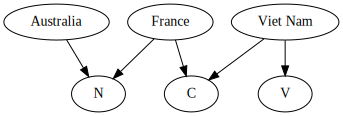

In [15]:
#q13
countries = ["Australia", "Viet Nam", "France"]
def dire(par):
    keys = loc(par).keys()
    for key in keys: 
        graph.node(key)
        graph.edge(par, key)
def loc(par):
    temp = []
    reg = df[df["region"]==par]["frequent"]
    for pl in reg:
        if pl in cur:
            temp.append(pl)
    final = []   
    for var in temp:
        if ini[var].state() == None:
            continue
        final.append(ini[var].state())
    return dict(final)



graph = Digraph()
for countr in countries:      
    loc(countr)
    dire(countr)
graph

In [16]:
#q14
  
ls = []
for elem in df["frequent"]:
    if elem in cur:
        ls.extend(ini[elem].addresses)
temp = dict(Counter(ls))
dic_final = {key: value for key, value in sorted(temp.items(), key=lambda item: item[1], reverse=True)}

ret = {}
for i, val in dic_final.items():
    if val >= 225:
        ret[i] = val
ret

{'801 CHERRY STREET\nSUITE 2100\nFORT WORTH TX 76102': 720,
 '801 CHERRY STREET\nSUITE 2100\nFORT WORTH TX 76102\n817-334-4100': 464,
 '1114 AVENUE OF THE AMERICAS\n29TH FLOOR\nNEW YORK NY 10036': 356,
 '1 SANSOME ST\n30TH FL\nSAN FRANCISCO CA 94104': 305,
 '10119 W. LARIAT LANE\nPEORIA AZ 85383': 289,
 '10119 W. LARIAT LANE\nPEORIA AZ 85383\n425-442-0931': 289,
 '1881 GROVE AVENUE\nRADFORD VA 24141': 277,
 '1 SANSOME ST\n30TH FL\nSAN FRANCISCO CA 94104\n3125066500': 264,
 '1251 AVENUE OF THE AMERICAS\nNEW YORK NY 10020': 225,
 '1251 AVENUE OF THE AMERICAS\nNEW YORK NY 10020\n212-956-2221': 225,
 '1177 WEST HASTINGS STREET\nSUITE 2300\nVANCOUVER A1 V6E 2K3': 225,
 '1177 WEST HASTINGS STREET\nSUITE 2300\nVANCOUVER A1 V6E 2K3\n604-683-6332': 225}

<AxesSubplot:>

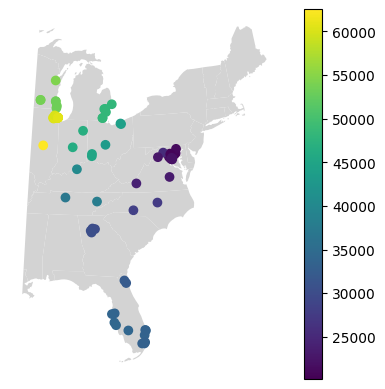

In [17]:
#q15
shape, loc = gpd.read_file("shapes/cb_2018_us_state_20m.shp"), gpd.read_file("locations.geojson")
crop = box(-90,50,-55, 20)
ret = []
for location in loc['address']:
    word = re.findall(r'[A-Z]{2}\s([0-9]{5})\-?', location)
    if word:ret.extend(word)
    else:ret.extend('0')
loc["ad"] = list(map(float, ret))  
intsct = shape.intersection(crop).to_crs("epsg:2022")
ax = intsct.plot(facecolor = "lightgrey")
ax.set_axis_off()
data = loc[loc.intersects(crop)].to_crs("epsg:2022")
range_ = data.loc[(20000 <= data["ad"] )&(70000 >= data["ad"]) ]
range_.plot(ax = ax, cmap = "viridis", column = "ad", legend = True)